In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/lei'ao/Desktop/loan.csv",low_memory=False)

In [7]:
df = df[['loan_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'dti', 'purpose', 'loan_status']]

In [8]:
df = df.dropna()

In [9]:
df = df[df.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [10]:
df['is_default'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1}) # 构建违约标签

In [16]:
default_rate = df['is_default'].mean()
print(f"整体违约率: {default_rate:.2%}") #分析1：整体违约率

整体违约率: 17.89%


In [52]:
df['income_bin'] = pd.cut(df['annual_inc'], bins=[0, 30000, 60000, 100000, float('inf')], 
                          labels=['<30k', '30k-60k', '60k-100k', '>100k'])
income_default = df.groupby('income_bin',observed=True)['is_default'].mean()
income_default                          #分析2：年收入分层 vs 违约率

income_bin
<30k        0.240966
30k-60k     0.204764
60k-100k    0.159835
>100k       0.124785
Name: is_default, dtype: float64

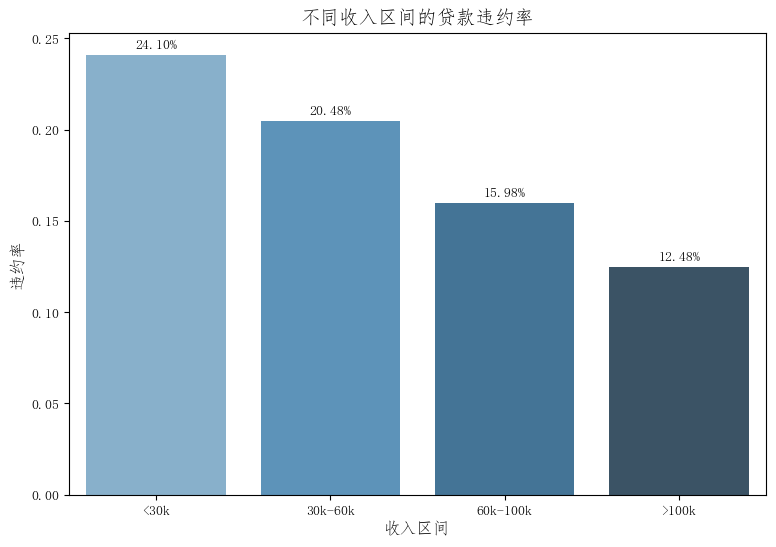

In [54]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(9,6))
ax1 = sns.barplot(x=income_default.index, y=income_default.values,hue=income_default.index,palette='Blues_d',legend=False)
for p1 in ax1.patches:
    # 获取条形的高度（即 y 值，违约率）
    height1 = p1.get_height()  
    # 在条形上方/内部添加文本标注，格式为保留2位小数
    ax1.annotate(
        f'{height1:.2%}',  # 标注内容：数值格式化
        xy=(p1.get_x() + p1.get_width() / 2, height1),  # 标注位置：条形中心上方
        xytext=(0, 3),  # 文本偏移：向上3个像素
        textcoords="offset points",  # 偏移坐标类型
        ha='center', va='bottom'  # 水平居中，垂直靠下
    )
plt.title('不同收入区间的贷款违约率', fontsize=14)
plt.xlabel('收入区间', fontsize=12)
plt.ylabel('违约率', fontsize=12)
plt.savefig("C:/Users/lei'ao/Desktop/income_default.png")

In [55]:
purpose_default = df.groupby('purpose',observed=True)['is_default'].mean()
purpose_default = purpose_default.sort_values(ascending=False)
purpose_default       #分析3：贷款用途分层 vs 违约率

purpose
small_business        0.288875
moving                0.209566
other                 0.205645
renewable_energy      0.202247
medical               0.199369
debt_consolidation    0.186023
house                 0.173123
educational           0.172308
vacation              0.170025
credit_card           0.156282
home_improvement      0.151986
major_purchase        0.139505
wedding               0.135550
car                   0.122874
Name: is_default, dtype: float64

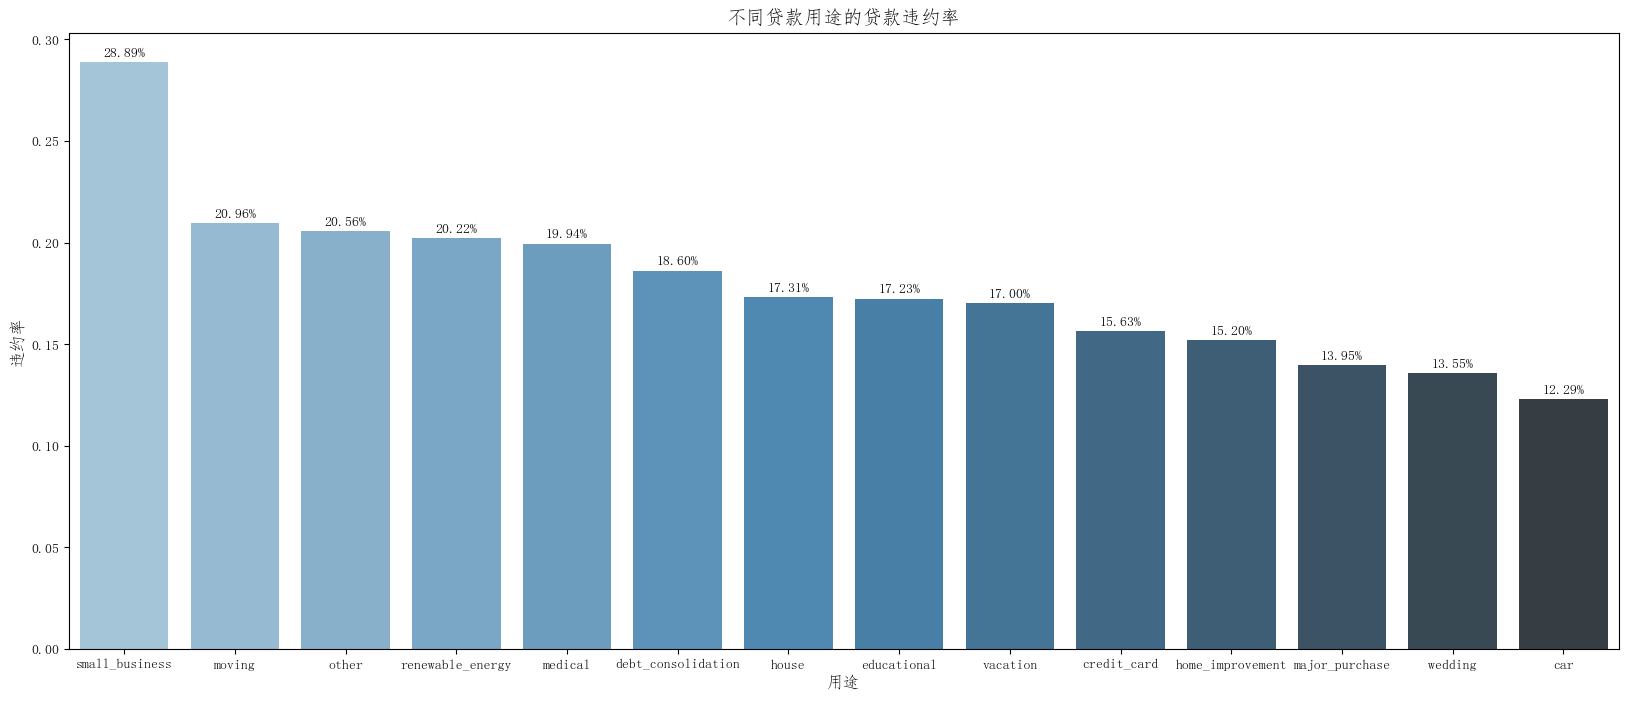

In [59]:
plt.figure(figsize=(20,8))
ax2=sns.barplot(x=purpose_default.index, y=purpose_default.values,hue=purpose_default.index,palette='Blues_d',legend=False)
for p2 in ax2.patches:
    # 获取条形的高度（即 y 值，违约率）
    height2 = p2.get_height()  
    # 在条形上方/内部添加文本标注，格式为保留2位小数
    ax2.annotate(
        f'{height2:.2%}',  # 标注内容：数值格式化
        xy=(p2.get_x() + p2.get_width() / 2, height2),  # 标注位置：条形中心上方
        xytext=(0, 3),  # 文本偏移：向上3个像素
        textcoords="offset points",  # 偏移坐标类型
        ha='center', va='bottom'  # 水平居中，垂直靠下
    )
plt.title('不同贷款用途的贷款违约率', fontsize=14)
plt.xlabel('用途', fontsize=12)
plt.ylabel('违约率', fontsize=12)
plt.savefig("C:/Users/lei'ao/Desktop/purpose_default.png")

In [62]:
df['dti_bin'] = pd.cut(df['dti'], bins=[0, 15, 25, 35, 45, float('inf')], 
                          labels=['<15%', '15%-25%', '25%-35%', '35%-45%', '>45%'])
dti_default = df.groupby('dti_bin',observed=True)['is_default'].mean()
dti_default                          #分析4：Dti分层 vs 违约率

dti_bin
<15%       0.141054
15%-25%    0.191186
25%-35%    0.255924
35%-45%    0.304406
>45%       0.000000
Name: is_default, dtype: float64

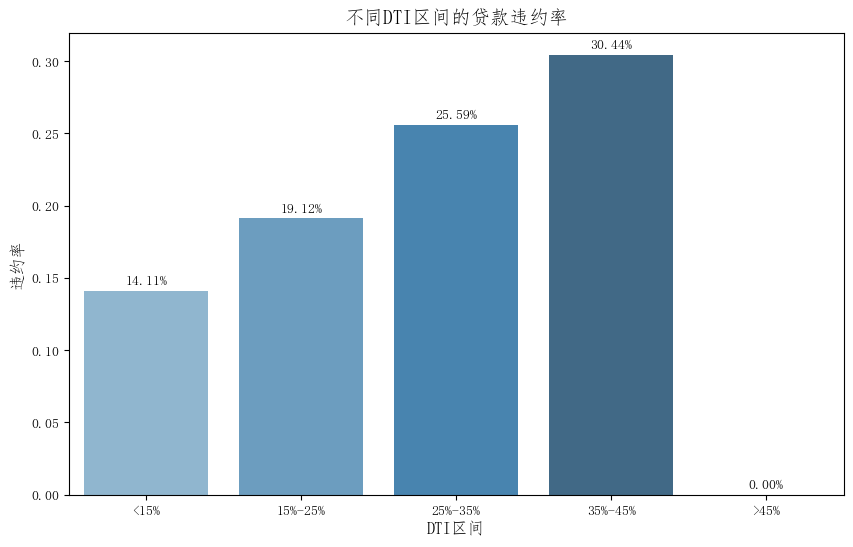

In [65]:
plt.figure(figsize=(10,6))
ax3=sns.barplot(x=dti_default.index, y=dti_default.values,hue=dti_default.index,palette='Blues_d',legend=False)
for p3 in ax3.patches:
    # 获取条形的高度（即 y 值，违约率）
    height3 = p3.get_height()  
    # 在条形上方/内部添加文本标注，格式为保留2位小数
    ax3.annotate(
        f'{height3:.2%}',  # 标注内容：数值格式化
        xy=(p3.get_x() + p3.get_width() / 2, height3),  # 标注位置：条形中心上方
        xytext=(0, 3),  # 文本偏移：向上3个像素
        textcoords="offset points",  # 偏移坐标类型
        ha='center', va='bottom'  # 水平居中，垂直靠下
    )
plt.title('不同DTI区间的贷款违约率', fontsize=14)
plt.xlabel('DTI区间', fontsize=12)
plt.ylabel('违约率', fontsize=12)
plt.savefig("C:/Users/lei'ao/Desktop/dti_default.png")